# Cosmic Ray Helium Spectrum up to the Knee

In [348]:
from pylab import *
from scipy.optimize import minimize
from scipy import interpolate

In [349]:
m_p = 0.938 # Proton mass
Z = 2 # Atomic number
A = 4 # Mass number
n = 4 # Number of nucleons in H

## PAMELA data from Adriani et al., Science 332, 69 (2011)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [367]:
data_PAMELA_He = np.genfromtxt("Data/Helium/PAMELA_He_data.txt")
R_PAMELA = data_PAMELA_He[:,1]
E_PAMELA = (R_PAMELA * Z) 
flux_R_PAMELA = data_PAMELA_He[:,3]
flux_PAMELA = flux_R_PAMELA / Z 
error_PAMELA_stat = data_PAMELA_He[:,4] / Z 
error_PAMELA_syst = data_PAMELA_He[:,5] / Z 
error_PAMELA = np.sqrt(error_PAMELA_stat**2 + error_PAMELA_syst**2) 

# Consider E > 50 GeV
index_PAMELA = np.where(np.logical_and(E_PAMELA>=5e1, E_PAMELA<=1e5))
E_PAMELA = E_PAMELA[index_PAMELA]; flux_PAMELA = flux_PAMELA[index_PAMELA]; error_PAMELA = error_PAMELA[index_PAMELA]
print('PAMELA')
print('Number of data points:', len(E_PAMELA))

PAMELA
Number of data points: 30


## AMS02 data from Aguilar et al., PRL 114, 171103 (2015)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<R>$ (GV) $\quad$ [2] Bin range $\quad$ [3] Flux (per R bin)  (GV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err 

In [368]:
data_AMS02_He = np.genfromtxt("Data/Helium/AMS02_He_data.txt")
R_AMS02 = data_AMS02_He[:,1]
E_AMS02 = (R_AMS02 * Z) 
flux_R_AMS02 = data_AMS02_He[:,3]
flux_AMS02 = flux_R_AMS02 / Z 
error_AMS02_stat = data_AMS02_He[:,4] / Z 
error_AMS02_syst = data_AMS02_He[:,5] / Z 
error_AMS02 = np.sqrt(error_AMS02_stat**2 + error_AMS02_syst**2)

# Consider E > 50 GeV
index_AMS02 = np.where(np.logical_and(E_AMS02>=5e1, E_AMS02<=1e5))
E_AMS02 = E_AMS02[index_AMS02]; flux_AMS02 = flux_AMS02[index_AMS02]; error_AMS02 = error_AMS02[index_AMS02]
print('AMS02')
print('Number of data points:', len(E_AMS02))

AMS02
Number of data points: 40


## DAMPE data from Alemanno et al., PhRvL 126, 201102 (2021)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err

In [369]:
data_DAMPE_He = np.genfromtxt("Data/Helium/DAMPE_He_data.txt")
E_DAMPE = data_DAMPE_He[:,1]
flux_DAMPE = data_DAMPE_He[:,3]
error_DAMPE_stat = data_DAMPE_He[:,4]
error_DAMPE_syst = data_DAMPE_He[:,5]
error_DAMPE = np.sqrt(error_DAMPE_stat**2 + error_DAMPE_syst**2)

# Consider E > 50 GeV
index_DAMPE = np.where(np.logical_and(E_DAMPE>=5e1, E_DAMPE<=1e5))
E_DAMPE = E_DAMPE[index_DAMPE]; flux_DAMPE = flux_DAMPE[index_DAMPE]; error_DAMPE = error_DAMPE[index_DAMPE]
print('DAMPE')
print('Number of data points:', len(E_DAMPE))

DAMPE
Number of data points: 23


## CALET data from Adriani et al., PhRvL 130, 171002 (2023)
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Ek>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err (-) $\quad$ [6] Syst Err (+)

In [370]:
data_CALET_He = np.genfromtxt("Data/Helium/CALET_He_data.txt")
E_CALET = data_CALET_He[:,1]
flux_CALET = data_CALET_He[:,3]
error_CALET_stat = data_CALET_He[:,4]
error_CALET_syst_low = data_CALET_He[:,5]
error_CALET_syst_up = data_CALET_He[:,6]
error_CALET_low = np.sqrt(error_CALET_stat**2 + error_CALET_syst_low**2)
error_CALET_up = np.sqrt(error_CALET_stat**2 + error_CALET_syst_up**2)

# Consider E > 50 GeV
index_CALET = np.where(np.logical_and(E_CALET>=5e1, E_CALET<=1e5))
E_CALET = E_CALET[index_CALET]; flux_CALET = flux_CALET[index_CALET]; error_CALET_low = error_CALET_low[index_CALET]; error_CALET_up = error_CALET_up[index_CALET]
print('CALET')
print('Number of data points:', len(E_CALET))

CALET
Number of data points: 17


## CREAM data from Yoon et al., ApJ 839, 5 (2017)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Ek/n>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Ek/n bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-) $\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err

In [372]:
data_CREAM_He = np.genfromtxt("Data/Helium/CREAM_He_data.txt")
E_CREAM = data_CREAM_He[:,1] * n
flux_CREAM = data_CREAM_He[:,3] / n
error_CREAM_stat_low = data_CREAM_He[:,4] / n
error_CREAM_stat_up = data_CREAM_He[:,5] / n
error_CREAM_syst = data_CREAM_He[:,6] / n
error_CREAM_low = np.sqrt(error_CREAM_stat_low**2 + error_CREAM_syst**2)
error_CREAM_up = np.sqrt(error_CREAM_stat_up**2 + error_CREAM_syst**2)

# Consider E > 50 GeV
index_CREAM = np.where(np.logical_and(E_CREAM>=5e1, E_CREAM<=5e5))
E_CREAM = E_CREAM[index_CREAM]; flux_CREAM = flux_CREAM[index_CREAM]; error_CREAM_low = error_CREAM_low[index_CREAM]; error_CREAM_up = error_CREAM_up[index_CREAM]
print('CREAM')
print('Number of data points:', len(E_CREAM))

CREAM
Number of data points: 12


## ATIC data from Panov et al., Bull. Russian Acad. Sci. 73, 564 (2009)
### Data sets colums
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err $\quad$ [5] Syst Err 

In [378]:
data_ATIC_He = np.genfromtxt("Data/Helium/ATIC_He_data.txt")
E_ATIC = data_ATIC_He[:,1] - (A * m_p)
flux_ATIC = data_ATIC_He[:,3] * (E_ATIC / (E_ATIC - (A * m_p))) # Normalize to Ek
error_ATIC_stat = data_ATIC_He[:,4] * (E_ATIC / (E_ATIC - (A * m_p))) # Normalize to Ek
error_ATIC_syst = data_ATIC_He[:,3]*0.2 * (E_ATIC / (E_ATIC - (A * m_p))) # Estimated systemtaic error of 20%
error_ATIC = np.sqrt(error_ATIC_stat**2 + error_ATIC_syst**2)

# Consider E > 50 GeV
index_ATIC = np.where(np.logical_and(E_ATIC>=5e1, E_ATIC<=1e5))
E_ATIC = E_ATIC[index_ATIC]; flux_ATIC = flux_ATIC[index_ATIC]; error_ATIC = error_ATIC[index_ATIC]
print('ATIC')
print('Number of data points:', len(E_ATIC))

ATIC
Number of data points: 14


## IceCube data from Aartsen et al., PhRvD 100, 082002 (2019)
#### *Using SIBYLL2.1*
### Data sets columns:
#### [0] Quantity $\quad$ [1] $<Etot>$ (GeV) $\quad$ [2] Bin range $\quad$ [3] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [4] Stat Err (-)$\quad$ [5] Stat Err (+) $\quad$ [6] Syst Err (-) $\quad$ [7] Syst Err (+)

In [382]:
data_ICECUBE_He = np.genfromtxt("Data/Helium/ICECUBE_He_data.txt")
E_ICECUBE = data_ICECUBE_He[:,1] - (A * m_p)
flux_ICECUBE = data_ICECUBE_He[:,3] * (E_ICECUBE / (E_ICECUBE - (A * m_p))) # Normalize to Ek
error_ICECUBE_stat_low = data_ICECUBE_He[:,4] * (E_ICECUBE / (E_ICECUBE - (A * m_p))) # Normalize to Ek
error_ICECUBE_stat_up = data_ICECUBE_He[:,5] * (E_ICECUBE / (E_ICECUBE - (A * m_p))) # Normalize to Ek
error_ICECUBE_syst_low = data_ICECUBE_He[:,6] * (E_ICECUBE / (E_ICECUBE - (A * m_p))) # Normalize to Ek
error_ICECUBE_syst_up = data_ICECUBE_He[:,7] * (E_ICECUBE / (E_ICECUBE - (A * m_p))) # Normalize to Ek
error_ICECUBE_low = np.sqrt(error_ICECUBE_stat_low**2 + error_ICECUBE_syst_low**2)
error_ICECUBE_up = np.sqrt(error_ICECUBE_stat_up**2 + error_ICECUBE_syst_up**2)

# Consider E > 50 GeV
index_ICECUBE = np.where(np.logical_and(E_ICECUBE>=5e1, E_ICECUBE<=1e9))
#E_ICECUBE = E_ICECUBE[index_ICECUBE]; flux_ICECUBE = flux_ICECUBE[index_ICECUBE]; error_ICECUBE_low = error_ICECUBE_low[index_ICECUBE]; error_ICECUBE_up = error_ICECUBE_up[index_ICECUBE]
print('IceTop')
print('Number of data points:', len(E_ICECUBE))

IceTop
Number of data points: 19


## KASCADE-Grande data from M. Finger (2011) Thesis (DOI:10.5445/IR/1000023830)
#### *Using QGSJet-II-2*
### Data sets columns:
#### [0] $<Etot>$ (GeV) $\quad$ [1] Flux (per Etot bin)  (GeV m2 s sr)-1 $\quad$ [2] Stat Err (-) $\quad$  [3] Stat Err (+) $\quad$ [4] Syst Err (-) $\quad$ [5] Syst Err (+)

In [383]:
data_KASCADE_He = np.genfromtxt("Data/Helium/KASCADE_He_data_QGSJet2.txt")
E_KASCADE = (data_KASCADE_He[:,0] / 1e9) - (A * m_p)
flux_KASCADE = (data_KASCADE_He[:,1] * 1e9) * (E_KASCADE / (E_KASCADE - (A * m_p))) # Normalize to Ek
error_KASCADE_low = (data_KASCADE_He[:,2] * 1e9) * (E_KASCADE / (E_KASCADE - (A * m_p))) # Normalize to Ek
error_KASCADE_up = (data_KASCADE_He[:,3]* 1e9) * (E_KASCADE / (E_KASCADE - (A * m_p))) # Normalize to Ek

# Consider E > 50 GeV
index_KASCADE = np.where(np.logical_and(E_KASCADE>=5e1, E_KASCADE<=1e9))
E_KASCADE = E_KASCADE[index_KASCADE]; flux_KASCADE = flux_KASCADE[index_KASCADE]
error_KASCADE_low = error_KASCADE_low[index_KASCADE]; error_KASCADE_up = error_KASCADE_up[index_KASCADE]
index_KASCADE_chi = np.where(np.logical_and(error_KASCADE_low!=0, error_KASCADE_low!=0))
E_KASCADE = E_KASCADE[index_KASCADE_chi]; flux_KASCADE = flux_KASCADE[index_KASCADE_chi]
error_KASCADE_low = error_KASCADE_low[index_KASCADE_chi]; error_KASCADE_up = error_KASCADE_up[index_KASCADE_chi]
print('KASCADE')
print('Number of data points:', len(E_KASCADE))

KASCADE
Number of data points: 9


## MODEL A: Four spectral breaks

In [409]:
# MODEL A
def Phi_A(E, K, E0, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4):
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)

In [410]:
# Joint chi^2
def Chi_A(parameters):
    K, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4 = parameters
    
    E = np.append( np.append( np.append( np.append( np.append( np.append( np.append(E_PAMELA, E_AMS02), E_ATIC ), E_CREAM), E_CALET), E_DAMPE), E_ICECUBE), E_KASCADE)
    Flux = np.append( np.append( np.append( np.append( np.append( np.append( np.append(flux_PAMELA, flux_AMS02), flux_ATIC ), flux_CREAM), flux_CALET), flux_DAMPE), flux_ICECUBE), flux_KASCADE)
    Sigma = np.append( np.append( np.append( np.append( np.append( np.append( np.append(2*error_PAMELA, 2*error_AMS02), 2*error_ATIC ), error_CREAM_low+error_CREAM_up), error_CALET_low+error_CALET_up), 2*error_DAMPE), error_ICECUBE_low+error_ICECUBE_up), error_KASCADE_low + error_KASCADE_up)
    
    E0 = 0.1 * 1e3 #GeV
    
    Phi_model = Phi_A(E, K, E0, alpha1, alpha2, alpha3, alpha4, alpha5, omega1, omega2, omega3, omega4, Eb1, Eb2, Eb3, Eb4)
    
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

In [411]:
# Initial guesses
K_bestfit = 3 * 10**(-2) #(GeV m2 s sr)-1
alpha1_bestfit = 2.805
alpha2_bestfit = 2.56
alpha3_bestfit = 2.874
alpha4_bestfit = 2.7
alpha5_bestfit = 3.1
omega1_bestfit = 0.28
omega2_bestfit = 0.163
omega3_bestfit = 0.1
omega4_bestfit = 0.1
Eb1_bestfit = 2 * 0.670 #TeV
Eb2_bestfit = 2 * 16 #TeV
Eb3_bestfit = 2 * 0.2  #PeV
Eb4_bestfit = 2 * 3 #PeV

# Minimization of chi^2
output = minimize(Chi_A, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, omega4_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit, Eb4_bestfit), method='L-BFGS-B')
best_fit_values = output['x']
print('Success:', output['success'])

Success: True


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/1114380691.py:7: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


In [499]:
# Best fit values

print('MY BEST FIT VALUES (Model with 4 breaks):')
# Normalization
print('K:', round(best_fit_values[0],7)); 
# Spectral indices
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3));
print('alpha_3:', round(best_fit_values[3],3)); print('alpha_4:', round(best_fit_values[4],3));
print('alpha_5:', round(best_fit_values[5],3))
# Widths
print('omega1:', round(best_fit_values[6],3)); print('omega2:', round(best_fit_values[7],3));
print('omega3:', round(best_fit_values[8],3)); print('omega4:', round(best_fit_values[9],3)); 
# Energies
print('E1:', round(best_fit_values[10],3), 'TeV'); print('E2:', round(best_fit_values[11],3), 'TeV')
print('E3:', round(best_fit_values[12],3), 'PeV'); print('E4:', round(best_fit_values[13],3), 'PeV')

print('')

# Chi^2 and N_dof
min_chi = Chi_A(best_fit_values)
n_dof = len(E_PAMELA) + len(E_AMS02) + len(E_ATIC) + len(E_CREAM) + len(E_CALET) + len(E_DAMPE) + len(E_ICECUBE)
print('chi^2_min:', round(min_chi,7))
print('N_dof:', n_dof)
print('Reduced chi^2_min:', round(min_chi / n_dof, 7))


# Chi^2 for rigidity scenario
best_fit_values[12] = 1.2
min_chi = Chi_A(best_fit_values)
print('chi^2_min:', round(min_chi,7))
print('N_dof:', n_dof)
print('Reduced chi^2_min:', round(min_chi / n_dof, 7))

# Phi function 
logE = np.arange(0,9,0.1)
E = 10**logE
Phi_model_A = Phi_A(E, best_fit_values[0], 0.1 * 1e3, best_fit_values[1], best_fit_values[2], best_fit_values[3], best_fit_values[4], best_fit_values[5], best_fit_values[6], best_fit_values[7], best_fit_values[8], best_fit_values[9], best_fit_values[10], best_fit_values[11], best_fit_values[12], best_fit_values[13])

MY BEST FIT VALUES (Model with 4 breaks):
K: 0.0332401
alpha_1: 2.715
alpha_2: 2.474
alpha_3: 2.734
alpha_4: 2.04
alpha_5: 4.477
omega1: 0.28
omega2: 0.011
omega3: 0.1
omega4: 0.934
E1: 1.204 TeV
E2: 32.021 TeV
E3: 0.61 PeV
E4: 6.262 PeV

chi^2_min: 23.8765856
N_dof: 155
Reduced chi^2_min: 0.1540425
chi^2_min: 29.6060707
N_dof: 155
Reduced chi^2_min: 0.1910069


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/1114380691.py:7: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


In [495]:
def Errors_A(n,m,l,p,q):
    
    K_bestfit = 3 * 10**(-2) #(GeV m2 s sr)-1
    alpha1_bestfit = 2.805
    alpha2_bestfit = 2.56
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    alpha5_bestfit = 3.1
    omega1_bestfit = 0.28
    omega2_bestfit = 0.163
    omega3_bestfit = 0.1
    omega4_bestfit = 0.1
    Eb1_bestfit = 2 * 0.670 #TeV
    Eb2_bestfit = 2 * 16 #TeV
    Eb3_bestfit = 2 * 0.2  #PeV
    Eb4_bestfit = 2 * 3 #PeV

    output = minimize(Chi_A, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, alpha5_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, omega4_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit, Eb4_bestfit), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(q)
    fit = best_fit_values[n]
    for i in range(0, m):
        scan[i] = fit - (fit / p)*i
    for j in range(m, q):
        scan[j] = fit + (fit / l)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_A(best_fit_values)
    chi_sqrd = np.zeros(q)
    for k in range(0, q):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_A(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 15.9408

In [498]:
# Error of normilization
scan, fit, chi_sqrd = Errors_A(0,25,50,50,50,)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of first index
scan, fit, chi_sqrd = Errors_A(1,25,50,50,50)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha1'); print('Lower error:', fit - scan_interval[13]); print('Upper error:', scan_interval[15] - fit)

# Error of second index
scan, fit, chi_sqrd = Errors_A(2,20,1000,10,100)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[10]); print('Upper error:', scan_interval[11] - fit)

# Error of third index
scan, fit, chi_sqrd = Errors_A(3,20,1000,500,100)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha3'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of fourth index
scan, fit, chi_sqrd = Errors_A(4,25,50,50,50)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of fifth index
scan, fit, chi_sqrd = Errors_A(5,25,50,50,50)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha5'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of first width
scan, fit, chi_sqrd = Errors_A(6,20,10,10,500)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega1'); print('Lower error:', fit - scan_interval[2]); print('Upper error:', scan_interval[3] - fit)

# Error of second width
scan, fit, chi_sqrd = Errors_A(7,10,1,10,500)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of third width
scan, fit, chi_sqrd = Errors_A(8,10,10,5,500)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega3'); print('Lower error:', fit - scan_interval[4]); print('Upper error:', scan_interval[5] - fit)

# Error of fourth width
scan, fit, chi_sqrd = Errors_A(9,20,10,10,500)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega4'); print('Lower error:', fit - scan_interval[9]); print('Upper error:', scan_interval[11] - fit)

# Error of first energy
scan, fit, chi_sqrd = Errors_A(10,100,10,100,1000)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of second energy
scan, fit, chi_sqrd = Errors_A(11,100,10,100,1000)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of third energy
scan, fit, chi_sqrd = Errors_A(12,100,10,100,1000)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E3'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of foruth energy
scan, fit, chi_sqrd = Errors_A(13,100,10,100,1000)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/1114380691.py:7: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


K
Lower error: 0.0006529250017340074
Upper error: 0.0006190109511989075
alpha1
Lower error: 0.05430411718547745
Upper error: 1.3151639975836944
alpha2
Lower error: 0.0009575349759400886
Upper error: 0.06588288204023307
alpha3
Lower error: 0.014550128507282878
Upper error: 0.01625842295102098
alpha4
Lower error: 0.24777923646809175
Upper error: 0.5925117657843644
alpha5
Lower error: 0.39997019066083794
Upper error: 1.2143499506800444


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/1114380691.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


omega1
Lower error: 0.22523606502015933
Upper error: 0.35646501343050113
omega2
Lower error: 0.002711114358561896
Upper error: 1.3327964591367127
omega3
Lower error: 0.02188417627412137
Upper error: 0.005838686281423117
omega4
Lower error: 0.09338100320694809
Upper error: 1.8676200641389489
E1
Lower error: 0.36133831591263776
Upper error: 3.280778566785394
E2
Lower error: 22.06434047805353
Upper error: 184.64401255196472
E3
Lower error: 0.3045581822370298
Upper error: 3.663827134531002
E4
Lower error: 2.6331561593911545
Upper error: 1.9785280520271282


## MODEL B: Three spectral breaks

In [389]:
# MODEL B
def Phi_B(E, K, E0, alpha1, alpha2, alpha3, alpha4, omega1, omega2, omega3, Eb1, Eb2, Eb3):
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) 

In [390]:
# Joint chi^2
def Chi_B(parameters):
    K, alpha1, alpha2, alpha3, alpha4, omega1, omega2, omega3, Eb1, Eb2, Eb3 = parameters
    
    E = np.append( np.append( np.append( np.append( np.append( np.append( np.append(E_PAMELA, E_AMS02), E_ATIC ), E_CREAM), E_CALET), E_DAMPE), E_ICECUBE), E_KASCADE)
    Flux = np.append( np.append( np.append( np.append( np.append( np.append( np.append(flux_PAMELA, flux_AMS02), flux_ATIC ), flux_CREAM), flux_CALET), flux_DAMPE), flux_ICECUBE), flux_KASCADE)
    Sigma = np.append( np.append( np.append( np.append( np.append( np.append( np.append(2*error_PAMELA, 2*error_AMS02), 2*error_ATIC ), error_CREAM_low+error_CREAM_up), error_CALET_low+error_CALET_up), 2*error_DAMPE), error_ICECUBE_low+error_ICECUBE_up), error_KASCADE_low + error_KASCADE_up)
    
    E0 = 0.1 * 1e3 #GeV
    
    Phi_model = Phi_B(E, K, E0, alpha1, alpha2, alpha3, alpha4, omega1, omega2, omega3, Eb1, Eb2, Eb3)
    
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

In [391]:
# Initial guesses
K_bestfit = 3 * 10**(-2) #(GeV m2 s sr)-1
alpha1_bestfit = 2.805
alpha2_bestfit = 2.56
alpha3_bestfit = 2.874
alpha4_bestfit = 2.7
omega1_bestfit = 0.28
omega2_bestfit = 0.163
omega3_bestfit = 0.1
Eb1_bestfit = 2 * 0.670   #GeV
Eb2_bestfit = 2 * 16 #GeV
Eb3_bestfit = 2 * 3  #TeV

# Minimization of chi^2
output = minimize(Chi_B, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit), method='L-BFGS-B')
best_fit_values = output['x']
print('Success:', output['success'])

Success: True


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: invalid value encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3)
/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3)
/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: overflow encountered in multiply
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delt

In [392]:
# Best fit values

print('MY BEST FIT VALUES (Model with 3 breaks):')
# Normalization
print('K:', round(best_fit_values[0],7)); 
# Spectral indices
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3));
print('alpha_3:', round(best_fit_values[3],3)); print('alpha_4:', round(best_fit_values[4],3));
# Widths
print('omega1:', round(best_fit_values[5],3)); print('omega2:', round(best_fit_values[6],3));
print('omega3:', round(best_fit_values[7],3))
# Energies
print('E1:', round(best_fit_values[8],3), 'PeV'); print('E2:', round(best_fit_values[9],3), 'PeV')
print('E3:', round(best_fit_values[10],3), 'PeV')

print('')

# Chi^2 and N_dof
min_chi = Chi_B(best_fit_values)
n_dof = len(E_PAMELA) + len(E_AMS02) + len(E_ATIC) + len(E_CREAM) + len(E_CALET) + len(E_DAMPE) + len(E_ICECUBE)
print('chi^2_min:', round(min_chi,7))
print('N_dof:', n_dof)
print('Reduced chi^2_min:', round(min_chi / n_dof, 7))

# Phi function 
logE = np.arange(0,9,0.1)
E = 10**logE
Phi_model_B = Phi_B(E, best_fit_values[0], 0.1 * 1e3, best_fit_values[1], best_fit_values[2], best_fit_values[3], best_fit_values[4], best_fit_values[5], best_fit_values[6], best_fit_values[7], best_fit_values[8], best_fit_values[9], best_fit_values[10])

MY BEST FIT VALUES (Model with 3 breaks):
K: 0.0332087
alpha_1: 2.778
alpha_2: 2.542
alpha_3: 2.732
alpha_4: 3.922
omega1: 0.278
omega2: 0.139
omega3: 0.276
E1: 1.222 PeV
E2: 32.009 PeV
E3: 6.079 PeV

chi^2_min: 24.4794125
N_dof: 155
Reduced chi^2_min: 0.1579317


In [393]:
def Errors_B_1(n):
    
    K_bestfit = 3 * 10**(-2) #(GeV m2 s sr)-1
    alpha1_bestfit = 2.805
    alpha2_bestfit = 2.56
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    omega1_bestfit = 0.28
    omega2_bestfit = 0.163
    omega3_bestfit = 0.1
    Eb1_bestfit = 2 * 0.670   #TeV
    Eb2_bestfit = 2 * 16 #TeV
    Eb3_bestfit = 2 * 3  #PeV

    output = minimize(Chi_B, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(50)
    fit = best_fit_values[n]
    for i in range(0, 25):
        scan[i] = fit - (fit / 50)*i
    for j in range(25, 50):
        scan[j] = fit + (fit / 50)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_B(best_fit_values)
    chi_sqrd = np.zeros(50)
    for k in range(0, 50):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_B(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 12.6473

# Error of normilization
scan, fit, chi_sqrd = Errors_B_1(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of first index
scan, fit, chi_sqrd = Errors_B_1(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha1'); print('Lower error:', fit - scan_interval[15]); print('Upper error:', scan_interval[17] - fit)

#print(scan_interval)

# Error of second index
scan, fit, chi_sqrd = Errors_B_1(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of third index
scan, fit, chi_sqrd = Errors_B_1(3)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha3'); print('Lower error:', fit - scan_interval[20]); print('Upper error:', scan_interval[22] - fit)

#print(scan_interval)

# Error of fifth index
scan, fit, chi_sqrd = Errors_B_1(4)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha5'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 0.0005737759144150423
Upper error: 0.0005581234295777282
alpha1


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: invalid value encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3)
/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3)
/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: overflow encountered in multiply
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delt

IndexError: index 15 is out of bounds for axis 0 with size 14

In [394]:
def Errors_B_2(n):
    
    K_bestfit = 3 * 10**(-2) #(GeV m2 s sr)-1
    alpha1_bestfit = 2.805
    alpha2_bestfit = 2.56
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    omega1_bestfit = 0.28
    omega2_bestfit = 0.163
    omega3_bestfit = 0.1
    Eb1_bestfit = 2 * 0.670   #TeV
    Eb2_bestfit = 2 * 16 #TeV
    Eb3_bestfit = 2 * 3  #PeV

    output = minimize(Chi_B, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 100):
        scan[i] = fit - (fit / 100)*i
    for j in range(100, 500):
        scan[j] = fit + (fit / 10)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_B(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_B(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 12.6473

# Error of second width
scan, fit, chi_sqrd = Errors_B_2(6)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omeag2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of fourth width
scan, fit, chi_sqrd = Errors_B_2(7)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omeag4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of second energy
scan, fit, chi_sqrd = Errors_B_2(9)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of fourth energy
scan, fit, chi_sqrd = Errors_B_2(10)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E4'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#print(chi_sqrd)

# Check chi^2 - chi^2_min distribution
#plt.plot(scan, scan_chi_all)
#plt.plot(scan, chi_sqrd)
#plt.ylim(0,yToFind)
#plt.axvline(x = fit, color='black')
#plt.axvline(x = scan_interval[0], linestyle='--', color='black')

omeag2
Lower error: 0.13066566585565165
Upper error: 1.3361903852412116
omeag4
Lower error: -2.1694550709848244


/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: invalid value encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3)
/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: overflow encountered in power
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3)
/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_75573/3169196810.py:6: RuntimeWarning: overflow encountered in multiply
  return K * (E / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delt

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
def Errors_B_3(n):
    
    K_bestfit = 3 * 10**(-2) #(GeV m2 s sr)-1
    alpha1_bestfit = 2.805
    alpha2_bestfit = 2.56
    alpha3_bestfit = 2.874
    alpha4_bestfit = 2.7
    omega1_bestfit = 0.28
    omega2_bestfit = 0.163
    omega3_bestfit = 0.1
    Eb1_bestfit = 2 * 0.670   #TeV
    Eb2_bestfit = 2 * 16 #TeV
    Eb3_bestfit = 2 * 3  #PeV

    output = minimize(Chi_B, (K_bestfit, alpha1_bestfit, alpha2_bestfit, alpha3_bestfit, alpha4_bestfit, omega1_bestfit, omega2_bestfit, omega3_bestfit, Eb1_bestfit, Eb2_bestfit, Eb3_bestfit), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    #for i in range(0, 100):
        #scan[i] = fit - (fit / 100)*i
    for j in range(0, 500):
        scan[j] = fit + (fit / 10)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_B(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_B(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 12.6473

# Error of first width
scan, fit, chi_sqrd = Errors_B_3(5)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega1'); #print('Lower error:', fit - scan_interval[0]); 
print('Upper error:', scan_interval[0] - fit)

# Error of first energy
scan, fit, chi_sqrd = Errors_B_3(8)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('E1'); #print('Lower error:', fit - scan_interval[0]); 
print('Upper error:', scan_interval[0] - fit)

## Plotting

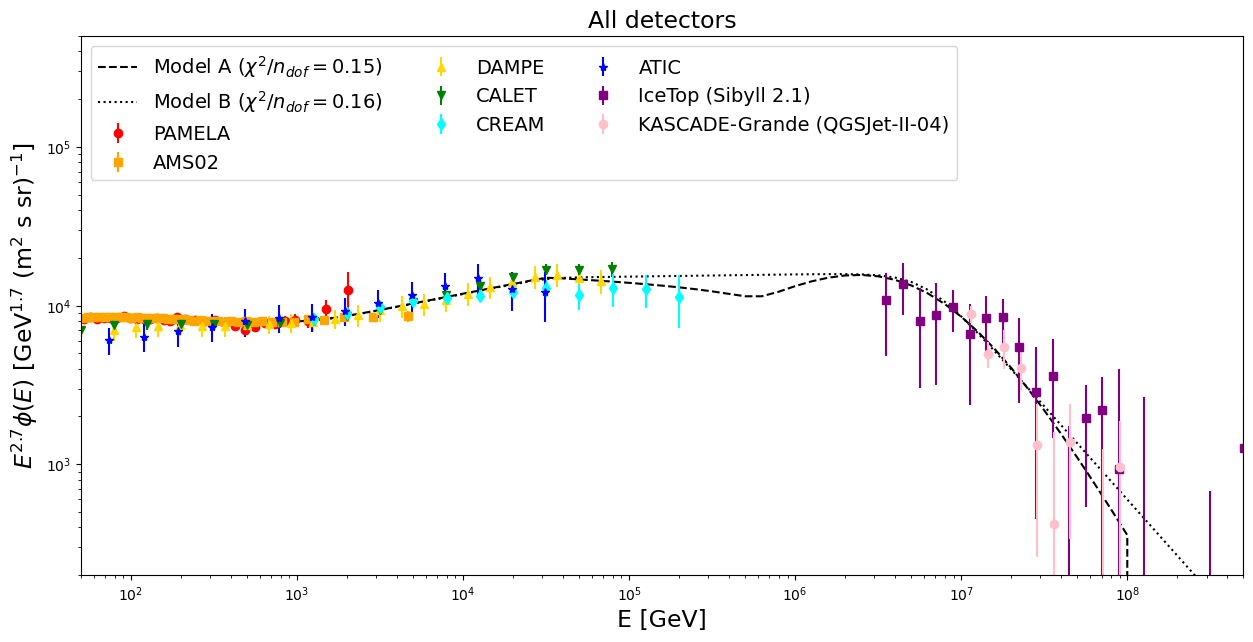

In [396]:
plt.figure(figsize=(15, 7))
# Models
plt.plot(E, Phi_model_A * E**2.7, '--', color='black', label=r'Model A ($\chi^2 / n_{dof} = 0.15$)')
plt.plot(E, Phi_model_B * E**2.7, ':', color='black', label=r'Model B ($\chi^2 / n_{dof} = 0.16$)')
# Low energy
plt.errorbar(E_PAMELA, flux_PAMELA * E_PAMELA**2.7, yerr=error_PAMELA * E_PAMELA**2.7, fmt='o', color='red', label='PAMELA')
plt.errorbar(E_AMS02, flux_AMS02 * E_AMS02**2.7, yerr=error_AMS02 * E_AMS02**2.7, fmt='s', color='orange', label='AMS02')
plt.errorbar(E_DAMPE, flux_DAMPE * E_DAMPE**2.7, yerr=error_DAMPE * E_DAMPE**2.7, fmt='^', color='gold', label='DAMPE')
plt.errorbar(E_CALET, flux_CALET * E_CALET**2.7, yerr=(error_CALET_low, error_CALET_low) * E_CALET**2.7, fmt='v', color='green', label='CALET')
plt.errorbar(E_CREAM, flux_CREAM * E_CREAM**2.7, yerr=(error_CREAM_low, error_CREAM_low) * E_CREAM**2.7, fmt='d', color='cyan', label='CREAM')
plt.errorbar(E_ATIC, flux_ATIC * E_ATIC**2.7, yerr=error_ATIC * E_ATIC**2.7, fmt='*', color='blue', label='ATIC')
# High energy
plt.errorbar(E_ICECUBE, flux_ICECUBE * E_ICECUBE**2.7, yerr=(error_ICECUBE_low, error_ICECUBE_up) * E_ICECUBE**2.7, fmt='s', color='purple', label='IceTop (Sibyll 2.1)')
plt.errorbar(E_KASCADE, flux_KASCADE * E_KASCADE**2.7, yerr=(error_KASCADE_low, error_KASCADE_up)  * E_KASCADE**2.7, fmt='o', color='pink', label='KASCADE-Grande (QGSJet-II-04)')
plt.loglog()
plt.xlim(5e1,5e8)
plt.ylim(2e2,5e5)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('All detectors', fontsize=17)
plt.savefig('/Users/luisenriqueespinosacastro/Documents/PhD/Research/Cosmic ray spectrum/Cosmic_Ray_Spectrum_Models/Plots/spectrum_high_energy_Helium.png')